# lambda 表达式练习

    lambda表创建匿名函数

In [1]:
list_1 = [1, 2, 3, 4, 5, 6, 7]
# 表示按照对3取余的结果来对原list排序，并不改变原list的值，返回排序后的新的list
list_res = sorted(list_1, key=lambda x: x % 3) 
print('原列表为：{}，按照各元素对3取余后的结果排序后的新列表为：{}'.format(list_1, list_res))

原列表为：[1, 2, 3, 4, 5, 6, 7]，按照各元素对3取余后的结果排序后的新列表为：[3, 6, 1, 4, 7, 2, 5]


In [2]:
# 创建匿名函数
number_plus = lambda x, y: x + y

In [3]:
a_plus_b_res = number_plus(100, 210)
print("The result is {}".format(a_plus_b_res))

The result is 310


# search policy（搜索策略）

In [4]:
# 各个省会城市坐标候选集
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

### 字符串转字典

In [5]:
city_dict = {}
for string in coordination_source.split('\n'):
    if string:
        start_index = string.find('\'') + 1
        end_index = string.find('\'', start_index)
        position = string[string.find('[') + 1:string.find(']')].split(', ')
        position_list = [float(position[0]), float(position[1])]
        city_dict[string[start_index:end_index]] = position_list

In [6]:
print(city_dict)

{'兰州': [103.73, 36.03], '嘉峪关': [98.17, 39.47], '西宁': [101.74, 36.56], '成都': [104.06, 30.67], '石家庄': [114.48, 38.03], '拉萨': [102.73, 25.04], '贵阳': [106.71, 26.57], '武汉': [114.31, 30.52], '郑州': [113.65, 34.76], '济南': [117.0, 36.65], '南京': [118.78, 32.04], '合肥': [117.27, 31.86], '杭州': [120.19, 30.26], '南昌': [115.89, 28.68], '福州': [119.3, 26.08], '广州': [113.23, 23.16], '长沙': [113.0, 28.21], '海口': [110.35, 20.02], '沈阳': [123.38, 41.8], '长春': [125.35, 43.88], '哈尔滨': [126.63, 45.75], '太原': [112.53, 37.87], '西安': [108.95, 34.27], '台湾': [121.3, 25.03], '北京': [116.46, 39.92], '上海': [121.48, 31.22], '重庆': [106.54, 29.59], '天津': [117.2, 39.13], '呼和浩特': [111.65, 40.82], '南宁': [108.33, 22.84], '西藏': [91.11, 29.97], '银川': [106.27, 38.47], '乌鲁木齐': [87.68, 43.77], '香港': [114.17, 22.28], '澳门': [113.54, 22.19]}


### 画出网络图

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [8]:
city_graph = nx.Graph()

In [9]:
city_graph.add_nodes_from(list(city_dict.keys()))

In [10]:
%matplotlib inline

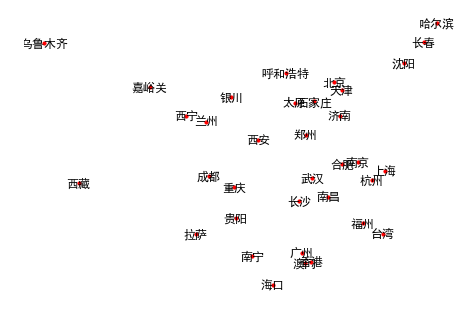

In [11]:
nx.draw(city_graph, city_dict, with_labels=True, node_size=10)

In [12]:
import math

In [13]:
# 计算两地之间的距离
def calculate_distance(address_start, address_end):
    dimension_start, longitude_start = city_dict[address_start]
    dimension_end, longitude_end = city_dict[address_end]
    radius = 6371  # km
    dimension_d = math.radians(dimension_end - dimension_start)
    longitude_d = math.radians(longitude_end - longitude_start)
    val_a = (math.sin(dimension_d / 2) * math.sin(dimension_d / 2) +
         math.cos(math.radians(dimension_start)) * math.cos(math.radians(dimension_end)) *
         math.sin(longitude_d / 2) * math.sin(longitude_d / 2))
    return radius * 2 * math.atan2(math.sqrt(val_a), math.sqrt(1 - val_a))

In [14]:
calculate_distance('上海', '杭州')

153.5185697155768

### 给定一个阈值，在范围内的构成一个网络

In [15]:
threshold = 300 # 设置300km

In [16]:
connection_addr = {}
for start_city in city_dict.keys():
    next_city = []
    for end_city in city_dict.keys():
        city_distance = calculate_distance(start_city, end_city)
        if 0 < city_distance <= 300:
#             print(city_distance, end_city)
            next_city.append(end_city)
    if next_city: connection_addr[start_city] = next_city
print(connection_addr)

{'兰州': ['西宁', '成都', '银川'], '西宁': ['兰州', '成都', '拉萨'], '成都': ['兰州', '西宁', '拉萨', '重庆'], '石家庄': ['郑州', '济南', '太原', '北京'], '拉萨': ['西宁', '成都'], '贵阳': ['重庆', '南宁'], '武汉': ['郑州', '南昌', '长沙'], '郑州': ['石家庄', '武汉', '长沙', '太原'], '济南': ['石家庄', '合肥', '北京', '天津'], '南京': ['合肥', '杭州'], '合肥': ['济南', '南京', '南昌'], '杭州': ['南京', '福州', '上海'], '南昌': ['武汉', '合肥'], '福州': ['杭州', '台湾'], '广州': ['长沙', '香港', '澳门'], '长沙': ['武汉', '郑州', '广州', '香港', '澳门'], '海口': ['南宁'], '沈阳': ['长春'], '长春': ['沈阳', '哈尔滨'], '哈尔滨': ['长春'], '太原': ['石家庄', '郑州', '呼和浩特'], '台湾': ['福州'], '北京': ['石家庄', '济南', '天津'], '上海': ['杭州'], '重庆': ['成都', '贵阳', '银川'], '天津': ['济南', '北京'], '呼和浩特': ['太原'], '南宁': ['贵阳', '海口'], '银川': ['兰州', '重庆'], '香港': ['广州', '长沙', '澳门'], '澳门': ['广州', '长沙', '香港']}


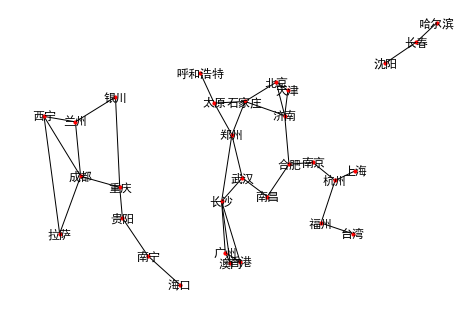

In [17]:
nx.draw(nx.Graph(connection_addr), city_dict, with_labels=True, node_size=10)

### 计算两个地点之间经过哪些站点

#### 先来个简单的测试

In [38]:
simple_connection_addr = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['太原', '兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京'],
    '南宁': ['长沙'],
    '福州': ['长沙'],
}

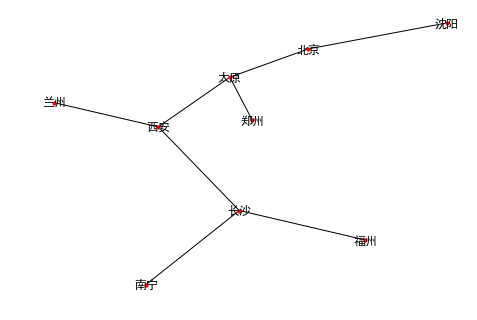

In [39]:
nx.draw(nx.Graph(simple_connection_addr), city_dict, with_labels=True, node_size=10)

In [40]:
from collections import defaultdict

In [21]:
# 测试获取一个不存在的key时，返回空list
t = {
    'a': '1',
    'b': '2',
    'c': '3',
}
new_t = defaultdict(list)
new_t.update(t)
print(new_t)
print(new_t['d'])

defaultdict(<class 'list'>, {'a': '1', 'b': '2', 'c': '3'})
[]


### 搜索从某一点出发的所有路线

In [45]:
# 搜索从某一地出发的所有路线
def simple_search_path(start_addr, simple_connection_addr):
    # 处理下面在获取不存在key时异常问题
    connection_addr = defaultdict(list)
    connection_addr.update(simple_connection_addr)
    # 存放所有的路径，从 start_addr 出发
    all_paths = [[start_addr]]
    # 已经搜索过的地点
    visited_addr_list = set()
    # 结果集
    paths_result = []
    while all_paths:
        b = True
        # 取出最先加入的地址，开始搜索
        one_path = all_paths.pop(0)
#         one_path = all_paths.pop()
        # 取出 path 的最后一个地址
        last_addr = one_path[-1]
        # 取出当前搜索地址连接的下一站地址
        next_addr_list = connection_addr[last_addr]
        for next_addr in next_addr_list:
            if next_addr in visited_addr_list: continue
            # 生成新的 path ，加入到all_paths中
            all_paths.append(one_path + [next_addr])
            b = False
        if b: paths_result.append(one_path)
        visited_addr_list.add(last_addr)
    return paths_result

In [46]:
simple_search_path('西安', simple_connection_addr)

[['西安', '长沙', '南宁'],
 ['西安', '长沙', '福州'],
 ['西安', '兰州'],
 ['西安', '太原', '郑州'],
 ['西安', '太原', '北京', '沈阳']]

    上述当 one_path = all_paths.pop() 时，结果如下：
    [['西安', '长沙', '南宁'],
     ['西安', '长沙', '福州'],
     ['西安', '兰州'],
     ['西安', '太原', '郑州'],
     ['西安', '太原', '北京', '沈阳']]
    当 one_path = all_paths.pop(0) 时，结果如下：
    [['西安', '兰州'],
     ['西安', '太原', '郑州'],
     ['西安', '长沙', '福州'],
     ['西安', '长沙', '南宁'],
     ['西安', '太原', '北京', '沈阳']]
    可以看出，第一种是深度优先遍历，第二种是广度优先遍历。

In [49]:
simple_search_path('石家庄', connection_addr)

[['石家庄', '北京', '天津', '济南', '合肥', '南昌', '武汉', '长沙', '澳门', '香港', '广州'],
 ['石家庄', '北京', '天津', '济南', '合肥', '南昌', '武汉', '长沙', '澳门', '广州'],
 ['石家庄', '北京', '天津', '济南', '合肥', '南昌', '武汉', '长沙', '香港'],
 ['石家庄', '北京', '天津', '济南', '合肥', '南昌', '武汉', '长沙', '广州'],
 ['石家庄', '北京', '天津', '济南', '合肥', '南昌', '武汉', '长沙', '郑州', '太原', '呼和浩特'],
 ['石家庄', '北京', '天津', '济南', '合肥', '南昌', '武汉', '郑州'],
 ['石家庄', '北京', '天津', '济南', '合肥', '南京', '杭州', '上海'],
 ['石家庄', '北京', '天津', '济南', '合肥', '南京', '杭州', '福州', '台湾'],
 ['石家庄', '北京', '济南'],
 ['石家庄', '太原'],
 ['石家庄', '济南'],
 ['石家庄', '郑州']]

### 搜索始发地道目的地的一条路径

In [50]:
# 搜索两地之间路线
def search_2_addr_path(start_addr, end_addr, simple_connection_addr):
    # 处理下面在获取不存在key时异常问题
    connection_addr = defaultdict(list)
    connection_addr.update(simple_connection_addr)
    # 存放所有的路径，从 start_addr 出发
    all_paths = [[start_addr]]
    # 已经搜索过的地点
    visited_addr_list = set()
    while all_paths:
        # 取出最先加入的地址，开始搜索
        one_path = all_paths.pop(0)
        # 取出 path 的最后一个地址
        last_addr = one_path[-1]
        # 取出当前搜索地址连接的下一站地址
        next_addr_list = connection_addr[last_addr]
        for next_addr in next_addr_list:
            if next_addr in visited_addr_list: continue
            if next_addr == end_addr: return one_path + [next_addr]
            # 生成新的 path ，加入到all_paths中
            all_paths.append(one_path + [next_addr])
        visited_addr_list.add(last_addr)
    return []

In [51]:
search_2_addr_path('太原', '南昌', connection_addr)

['太原', '郑州', '武汉', '南昌']

### 太原到南昌其实有两条路线：
    ['太原', '石家庄', '郑州', '武汉', '南昌']
    ['太原', '石家庄', '济南', '合肥', '南昌']
    但是我们可以根据距离找到最优的路线，上面那种方式，每次取的都是之前加入的地址那个路径，所以是广度优先遍历（breath first）；
    如果我们每次都选择最先加入节点的路径进行搜索，这种方式为深度优先遍历（depth first）。
|项目|优点|缺点|
|:-----------| :-------------|:-------------|
| depth first | 不全部保留结点，占用空间少  | 有回溯操作(即有入栈、出栈操作)，运行速度慢 | 
| breath first | 无回溯操作(即无入栈、出栈操作)，运行速度快  | 保留全部结点，占用空间大 | 

In [ ]:
# 搜索两地之间路线，根据距离
def search_2_addr_path(start_addr, end_addr, simple_connection_addr):
    # 处理下面在获取不存在key时异常问题
    connection_addr = defaultdict(list)
    connection_addr.update(simple_connection_addr)
    # 存放所有的路径，从 start_addr 出发
    all_paths = [[start_addr]]
    # 已经搜索过的地点
    visited_addr_list = set()
    while all_paths:
        # 取出最先加入的地址，开始搜索
        one_path = all_paths.pop()
        # 取出 path 的最后一个地址
        last_addr = one_path[-1]
        # 取出当前搜索地址连接的下一站地址
        next_addr_list = connection_addr[last_addr]
        for next_addr in next_addr_list:
            if next_addr in visited_addr_list: continue
            if next_addr == end_addr: return one_path + [next_addr]
            # 生成新的 path ，加入到all_paths中
            all_paths.append(one_path + [next_addr])
        visited_addr_list.add(last_addr)
    return []

In [ ]:
search_2_addr_path('太原', '南昌', connection_addr)

In [ ]:
# 搜索两地之间路线
def search_path(start_addr, end_addr, connection_addr):
    # 等待搜索的地点
    waiting_addr_list = [start_addr]
    # 已经搜索过的地点
    visited_addr_list = set()
    while waiting_addr_list:
        # 取出最先加入的地点，开始搜索
        waiting_addr = waiting_addr_list.pop(0)
        # 如果当前搜索地址已经被搜索过了，继续下一次循环
        if waiting_addr in visited_addr_list: continue
        # 取出当前搜索地址连接的下一站地址
        next_addr_list = connection_addr[waiting_addr]
        for next_addr in next_addr_list:
            if next_city in visited_addr_list: continue
            waiting_addr_list.append(next_city)
        visited_addr_list.add(waiting_addr)
    return waiting_addr_list

In [ ]:
l = [1, 2, 3]
l1 = l.copy()
l1.append(4)
print(l1)

In [ ]:
t = {
    1:[2, 3],
    2:[5, 4],
    3:[6, 7],
    4:[8, 9],
    5:[10, 11],
    6:[12, 13],
    7:[14, 15]
}
nx.draw(nx.Graph(t), with_labels=True)